In [1]:
%matplotlib inline

In [2]:
import os
from collections import defaultdict
from subprocess import check_output, run
from itertools import combinations
from shutil import copyfile

import numpy as np
import matplotlib.pyplot as plt


# Ensembles

In [3]:
filenames = [
    '~/repos/implicit_emotion/data/results/0314164f976c8ab9b374b5904478291e82a22a1f/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/61a37b17bf26f38d8c3bbdd11a80b173e69e095f/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/61a331eb2829041a9ae6df7e37723c9d3487c830/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/718c51e7380f304ec090ebc4a350be81c2db9a23/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/824d923d84dcbfa6bab314ad9536f8e425c8c7b5/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/3631ccd060cb1bc039a71264a3f0523c5bbe843c/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/bcd6824cc69e43575475adf5900db4a793c93f6e/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/cd959005277d6ccb227fc4cbe727e1531c25fab2/best_eval_probs.csv',
    '~/repos/implicit_emotion/data/results/7154bdc68231167ba22d0464ef1e5d0b8f5e6e3e/best_eval_probs.csv',
]
real_filenames = list(map(os.path.expanduser, filenames))

In [4]:
def run_eval_script(predictions_filepath):
    list_eval_command = [
            'python2',
            'evaluate-iest.py',
            os.path.expanduser('~/repos/implicit_emotion/data/trial-v3.labels'),
            predictions_filepath
        ]

    output = check_output(list_eval_command)
    performance = float(output.splitlines()[-1].split()[-1])
    return performance

In [5]:
performances = defaultdict(list)
for num_models in range(1, 10):
    best_combination = ''
    best_performance = 0
    for filenames_combination in combinations(real_filenames, num_models):

        filenames_combination = list(filenames_combination)

        list_command = ['python', '/Users/jabalazs/repos/implicit_emotion/ensemble.py']
        list_command += filenames_combination
        
        run(list_command)

#         list_eval_command = [
#             'python2',
#             'evaluate-iest.py',
#             os.path.expanduser('~/repos/implicit_emotion/data/trial-v3.labels'),
#             'ensembled_predictions.txt'
#         ]

#         output = check_output(list_eval_command)
        performance = run_eval_script('ensembled_predictions.txt')        
        performances[num_models].append(performance)

        if performance > best_performance:
            best_combination = filenames_combination
            best_performance = performance
            copyfile('ensembled_predictions.txt', f'ensembles/ensembled_predictions_best_{num_models}.txt')

    print()
    print('------------ RESULT ---------------')
    print(f'Best combination: {best_combination}')
    print(f'Best performance {best_performance}')
    
#     with open(f'ensembles/best_model_paths_{num_models}', 'w') as f:
#         for path in best_combination:
#             f.write(path + '\n')
#     with open(f'ensembles/best_eval_acc_{num_models}', 'w') as f:
#             f.write(str(best_performance) + '\n')


------------ RESULT ---------------
Best combination: ['/Users/jabalazs/repos/implicit_emotion/data/results/718c51e7380f304ec090ebc4a350be81c2db9a23/best_eval_probs.csv']
Best performance 0.6944711234

------------ RESULT ---------------
Best combination: ['/Users/jabalazs/repos/implicit_emotion/data/results/718c51e7380f304ec090ebc4a350be81c2db9a23/best_eval_probs.csv', '/Users/jabalazs/repos/implicit_emotion/data/results/cd959005277d6ccb227fc4cbe727e1531c25fab2/best_eval_probs.csv']
Best performance 0.701008594625

------------ RESULT ---------------
Best combination: ['/Users/jabalazs/repos/implicit_emotion/data/results/718c51e7380f304ec090ebc4a350be81c2db9a23/best_eval_probs.csv', '/Users/jabalazs/repos/implicit_emotion/data/results/3631ccd060cb1bc039a71264a3f0523c5bbe843c/best_eval_probs.csv', '/Users/jabalazs/repos/implicit_emotion/data/results/7154bdc68231167ba22d0464ef1e5d0b8f5e6e3e/best_eval_probs.csv']
Best performance 0.703815032995

------------ RESULT ---------------
Best 

In [6]:
performances

defaultdict(list,
            {1: [0.690639350866,
              0.688173236744,
              0.686703153946,
              0.6944711234,
              0.684570407206,
              0.686812712314,
              0.687424435924,
              0.688788165575,
              0.69270648552],
             2: [0.695825195807,
              0.696769274712,
              0.69743763158,
              0.691809405947,
              0.695608657088,
              0.696730578992,
              0.697791606048,
              0.698259928275,
              0.695017348306,
              0.699548576751,
              0.69452456843,
              0.698503816826,
              0.693679208865,
              0.699149385152,
              0.699571030939,
              0.697424555593,
              0.693333241717,
              0.694051901376,
              0.692581347022,
              0.692913265399,
              0.697242393811,
              0.695828563806,
              0.699385053232,
              0.6978

In [7]:
performances_ = {key: np.array(value) for key, value in performances.items()}

In [8]:
stats = {key: {'mean': value.mean(),
               'stdev': value.std(),
               'max': value.max()}
         for key, value in performances_.items()}

In [9]:
stats

{1: {'mean': 0.6889210079438889,
  'stdev': 0.0029663740441061735,
  'max': 0.6944711234},
 2: {'mean': 0.6962151305820278,
  'stdev': 0.0024374237557571714,
  'max': 0.701008594625},
 3: {'mean': 0.6997646160724762,
  'stdev': 0.0020720220705235533,
  'max': 0.703815032995},
 4: {'mean': 0.7011288254604444,
  'stdev': 0.001703265000965508,
  'max': 0.705121654863},
 5: {'mean': 0.7020233748169763,
  'stdev': 0.001368592744277602,
  'max': 0.705107285426},
 6: {'mean': 0.7025782435569761,
  'stdev': 0.0011438172283402394,
  'max': 0.705158646528},
 7: {'mean': 0.7029950869801388,
  'stdev': 0.0009487577191568162,
  'max': 0.704810242494},
 8: {'mean': 0.7034052983668889,
  'stdev': 0.0006683739300284949,
  'max': 0.704418741439},
 9: {'mean': 0.704030303343, 'stdev': 0.0, 'max': 0.704030303343}}

In [10]:
plt.style.available

['seaborn-dark',
 'seaborn-darkgrid',
 'seaborn-ticks',
 'fivethirtyeight',
 'seaborn-whitegrid',
 'classic',
 '_classic_test',
 'fast',
 'seaborn-talk',
 'seaborn-dark-palette',
 'seaborn-bright',
 'seaborn-pastel',
 'grayscale',
 'seaborn-notebook',
 'ggplot',
 'seaborn-colorblind',
 'seaborn-muted',
 'seaborn',
 'Solarize_Light2',
 'seaborn-paper',
 'bmh',
 'tableau-colorblind10',
 'seaborn-white',
 'dark_background',
 'seaborn-poster',
 'seaborn-deep']

In [11]:
plt.style.use('seaborn-whitegrid')

## Best Ensemble Combinations

[0.6944711234, 0.701008594625, 0.703815032995, 0.705121654863, 0.705107285426, 0.705158646528, 0.704810242494, 0.704418741439, 0.704030303343]


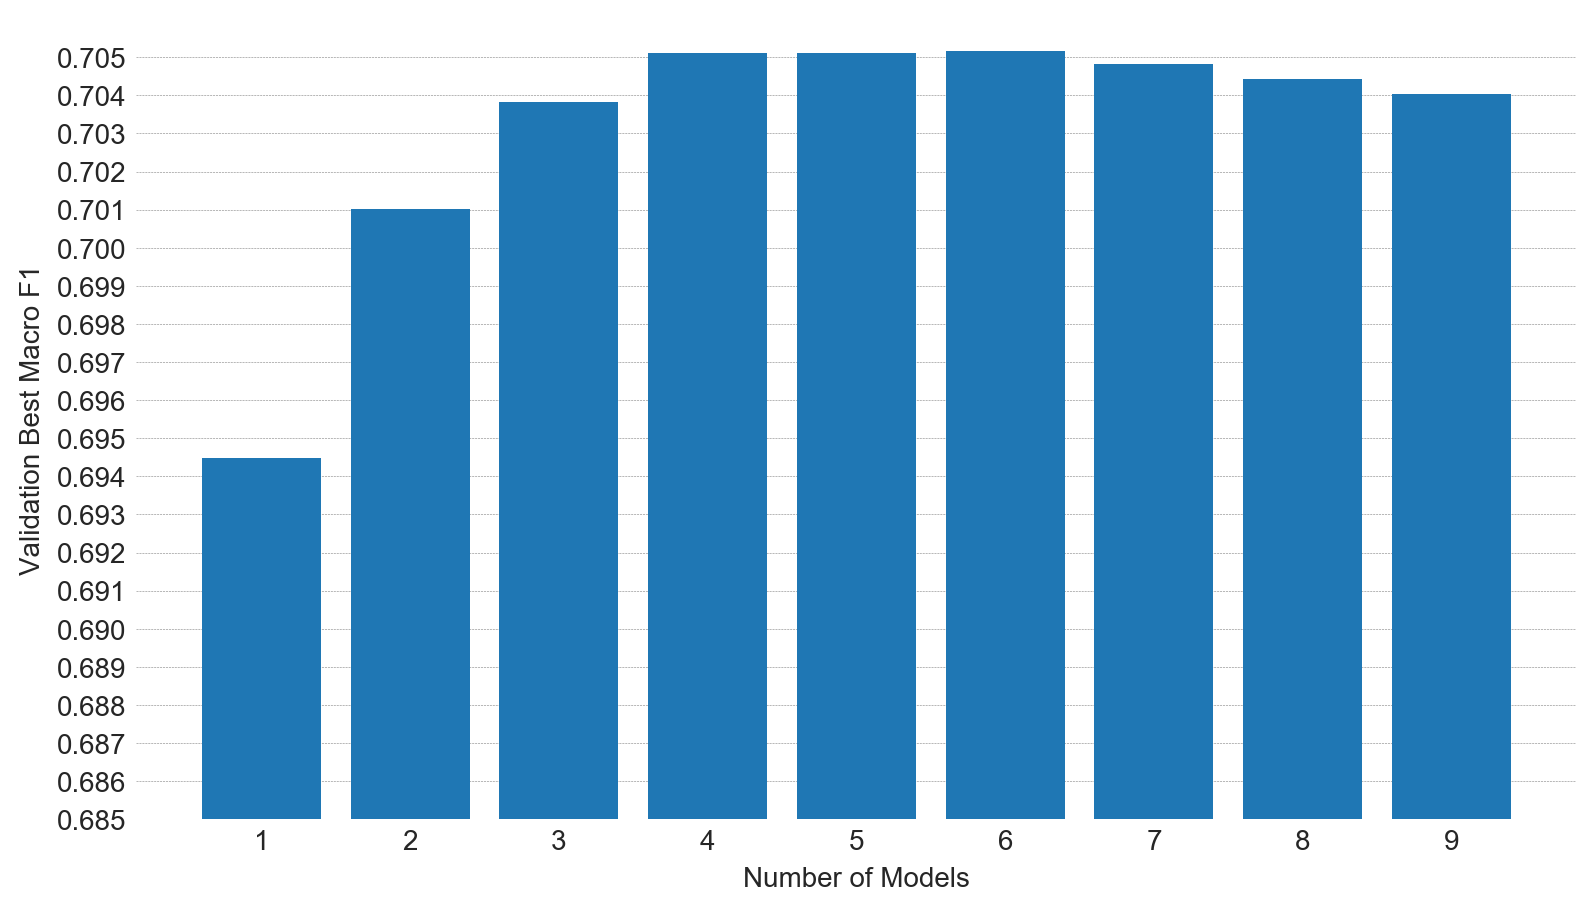

In [22]:
# from matplotlib.backends.backend_pdf import PdfPages, PdfFile

fig = plt.figure(dpi=200)
fig.set_size_inches(9, 5)

values = [stat['max'] for key, stat in stats.items()]
ticks = range(1, 10)

print(values)

# Main figure
left, bottom = 0.1, 0.1
width, height = 0.8, 0.8
ax = plt.axes([left, bottom, width, height])
ax.set_yticks(np.arange(0.65, 0.7055, 0.001))
ax.set_ylim((0.685, 0.706))

ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.0)
ax.set_ylabel('Validation Best Macro F1')
ax.set_xlabel('Number of Models')

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

barplot = ax.bar(ticks, values, tick_label=ticks, color=plt.cm.tab20.colors[0])

# eps is compatible with latex; pdf is not
# plt.savefig('paper/images/best_ensembles.eps')
    

## Average Ensemble combinations

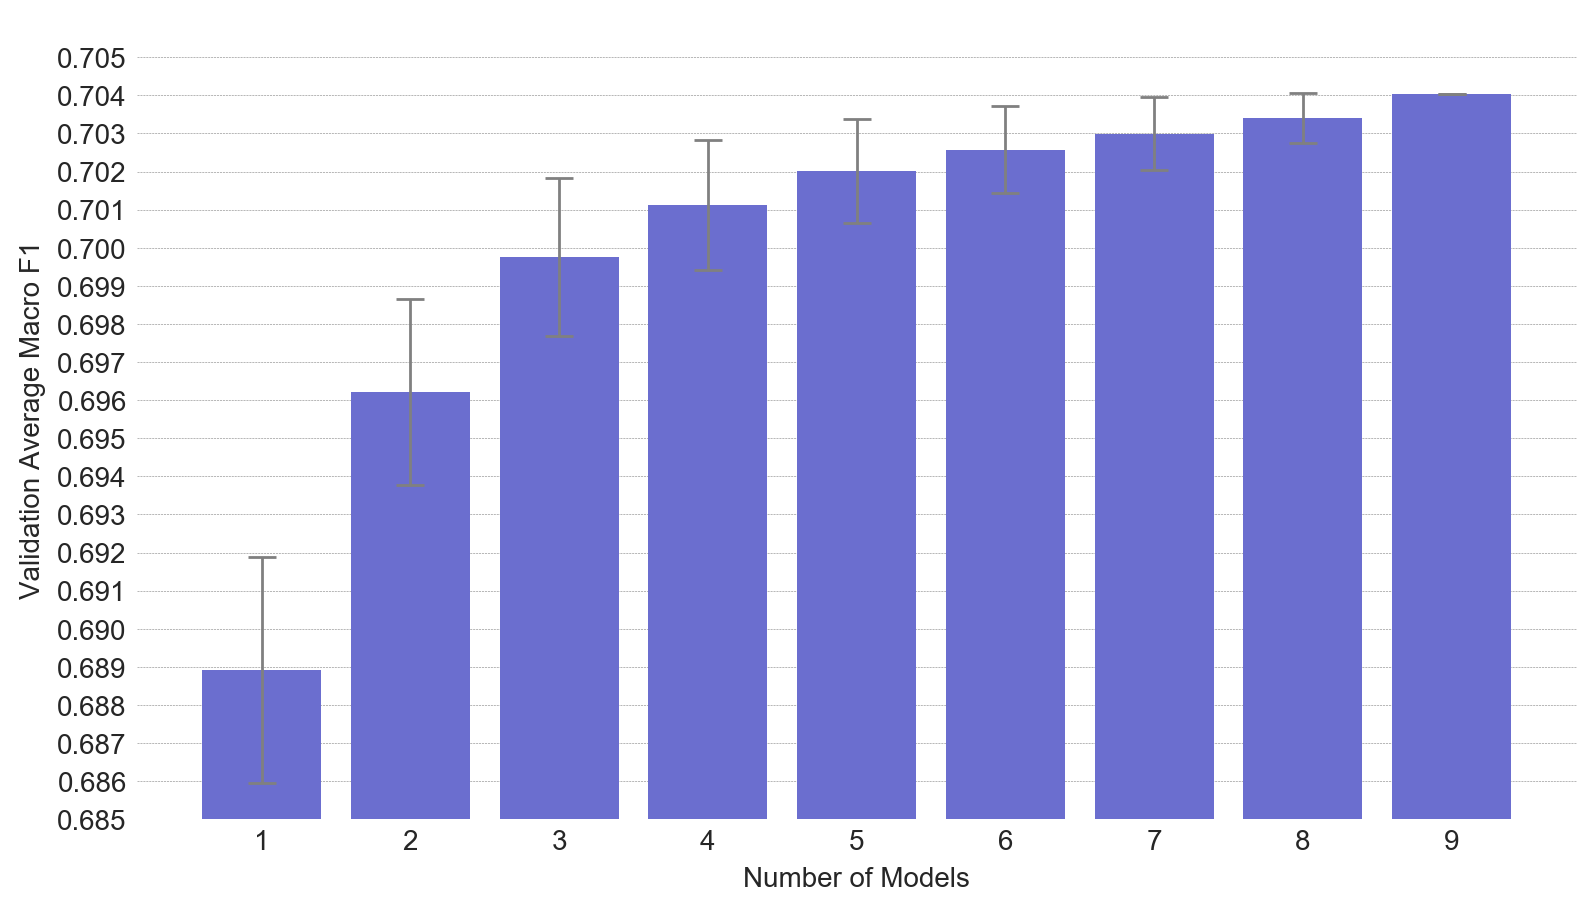

In [23]:
fig = plt.figure(dpi=200)
fig.set_size_inches(9, 5)

mean_values = [stat['mean'] for key, stat in stats.items()]
stdev_values = [stat['stdev'] for key, stat in stats.items()]
ticks = range(1, 10)

# Main figure
left, bottom = 0.1, 0.1
width, height = 0.8, 0.8
ax = plt.axes([left, bottom, width, height])
ax.set_yticks(np.arange(0.65, 0.7055, 0.001))
ax.set_ylim((0.685, 0.706))

ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.0)
ax.set_ylabel('Validation Average Macro F1')
ax.set_xlabel('Number of Models')

barplot = ax.bar(ticks,
                 mean_values,
                 yerr=stdev_values,
                 tick_label=ticks,
                 color=plt.cm.tab20b.colors[2],
                 error_kw=dict(ecolor='gray', lw=1, capsize=5, capthick=1))

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

# plt.savefig('paper/images/average_ensembles.eps')

# with PdfPages('paper/images/average_ensembles.pdf') as pdf:
#     pdf.savefig(dpi=fig.dpi)

## Best Validation Accuracy vs Training Data Proportion

Note that when chaining the training data proportion, the learning rate schedule iterations also change. I don't know whether this makes results uncomparable, but it does mess things a bit.

All models come from `cosmos`. `7154bdc68231167ba22d0464ef1e5d0b8f5e6e3e` came from `yatima`.

In [12]:
model_prediction_paths = [
    "data/results/c2e9a25ddd3cb4e4b4ee604eba1efd3ac884406f/predictions_dev.txt",  # 0.2
    "data/results/881dc7c10d887eb3d816eac324518cb122ccf7e3/predictions_dev.txt",  # 0.4
    "data/results/3a453c19b04e4c372b7fe1ddb994fcd8f630c83a/predictions_dev.txt",  # 0.6
    "data/results/fe8c7d31a09228c89599bbcd7f05fdf7232310ad/predictions_dev.txt",  # 0.8
#     "data/results/7154bdc68231167ba22d0464ef1e5d0b8f5e6e3e/predictions_dev.txt",  # 1.0
    "data/results/533aa65d2079a954ebcbda7847e046970ac97c75/predictions_dev.txt",  # 1.0
]

average_macro_f1s = [run_eval_script(path) for path in model_prediction_paths]

In [13]:
average_macro_f1s

[0.632717803313, 0.661631003219, 0.675957109299, 0.678665600969, 0.68990008609]

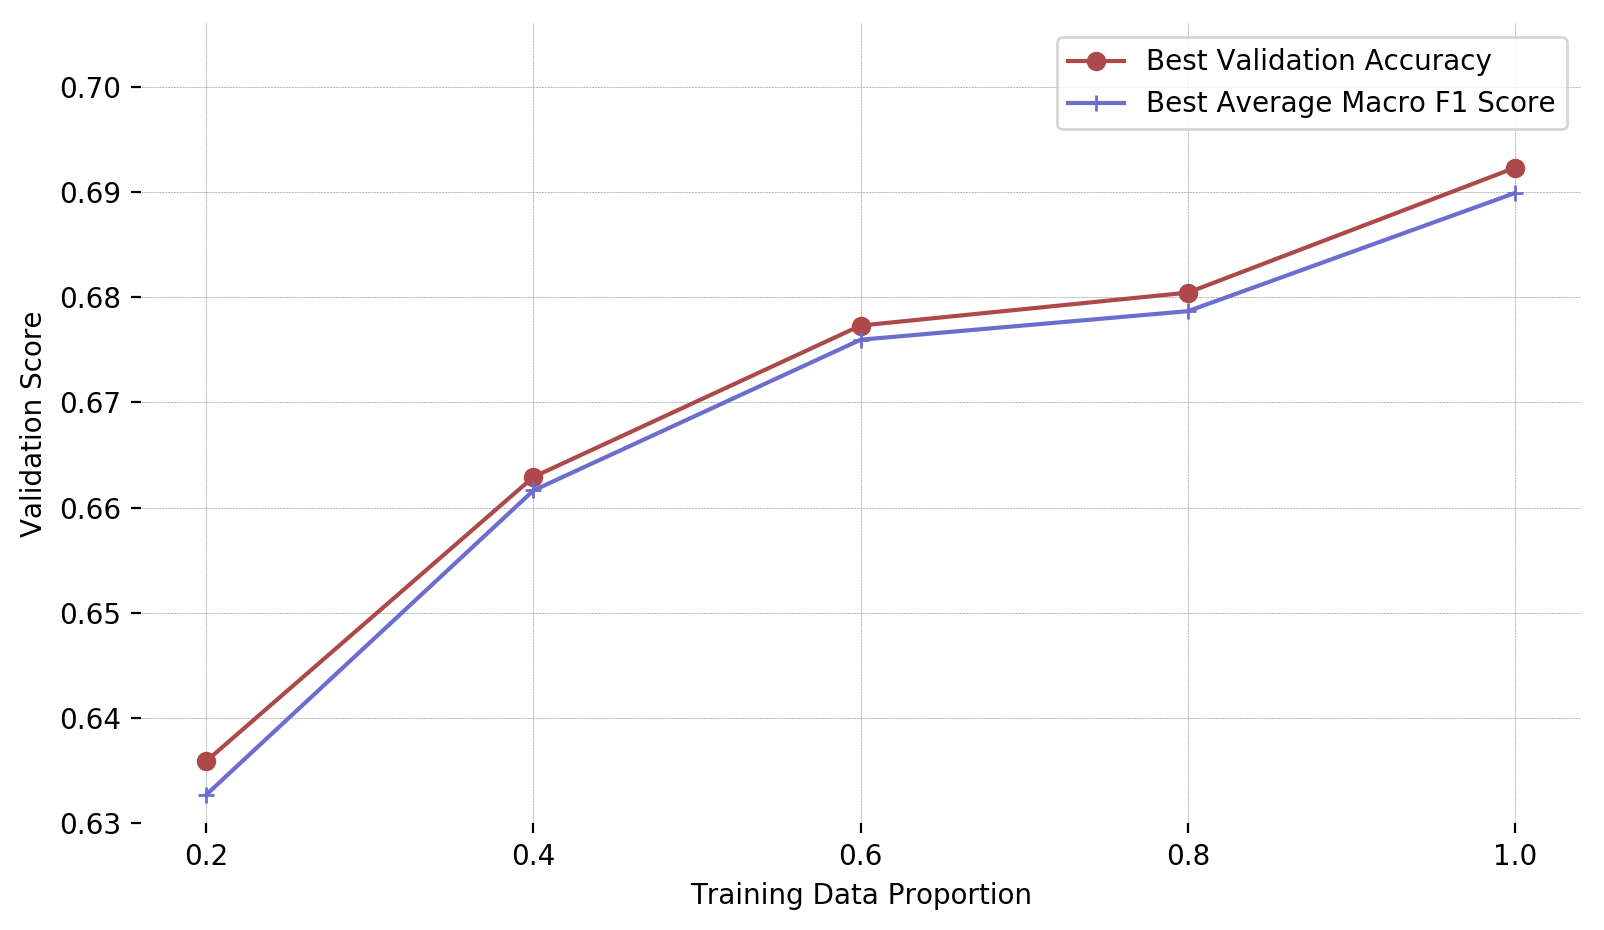

In [14]:
fig = plt.figure(dpi=200)
fig.set_size_inches(9, 5)

train_data_proportions = [0.2, 0.4, 0.6, 0.8, 1.0]
best_validation_accuracies = [0.6359086644, 
                              0.6629131477,
                              0.677301637,
                              0.6804295694,
                              0.6923] 

# Main figure
left, bottom = 0.1, 0.1
width, height = 0.8, 0.8
ax = plt.axes([left, bottom, width, height])
ax.set_xticks(np.arange(0.0, 1.1, 0.2))
ax.set_yticks(np.arange(0.63, 0.7055, 0.01))
ax.set_ylim((0.63, 0.706))

ax.grid(axis='y', color='gray', linestyle='--', linewidth=0.2)
ax.grid(axis='x', color='gray', linestyle='--', linewidth=0.2)
ax.set_ylabel('Validation Score')
ax.set_xlabel('Training Data Proportion')

line1 = ax.plot(train_data_proportions,
                best_validation_accuracies,
                color=plt.cm.tab20b.colors[13],
                marker="o",
                label="Best Validation Accuracy")

line2 = ax.plot(train_data_proportions,
                average_macro_f1s,
                color=plt.cm.tab20b.colors[2],
                marker="+",
                label="Best Average Macro F1 Score")

ax.legend()

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)

plt.savefig('paper/images/acc_vs_tdp_variation.eps')
# with PdfPages('paper/images/average_ensembles.pdf') as pdf:
#     pdf.savefig(dpi=fig.dpi)